In [1]:
%matplotlib inline
import sys
import os
import json
import csv

import matplotlib.pyplot as plt
from IPython.display import Image

from io import BytesIO
import PIL



In [6]:
from PIL import ImageDraw

In [2]:
def import_data(filename):
    data = []
    with open(filename) as json_data:
        data = json.load(json_data)
    return data

In [3]:
faces = import_data('./data/test_faces_with_faces.json')

In [4]:
len(faces)

7

In [5]:
# did we find a face in all of them?
for face in faces:
    print(str(len(face['faces'])))

1
1
1
1
1
1
1


In [9]:
faces[0]

{'faces': [{'faceAttributes': {'age': 40.6,
    'facialHair': {'beard': 0.7, 'moustache': 0.8, 'sideburns': 1.0},
    'gender': 'male',
    'glasses': 'NoGlasses',
    'headPose': {'pitch': 0.0, 'roll': -1.5, 'yaw': 4.8},
    'smile': 0.0},
   'faceId': 'bf5b0c53-399c-4e9a-a631-8dd44be6ead9',
   'faceLandmarks': {'eyeLeftBottom': {'x': 506.1, 'y': 345.0},
    'eyeLeftInner': {'x': 524.9, 'y': 341.8},
    'eyeLeftOuter': {'x': 487.6, 'y': 339.0},
    'eyeLeftTop': {'x': 506.8, 'y': 335.7},
    'eyeRightBottom': {'x': 620.9, 'y': 347.0},
    'eyeRightInner': {'x': 603.4, 'y': 341.2},
    'eyeRightOuter': {'x': 636.2, 'y': 343.0},
    'eyeRightTop': {'x': 620.3, 'y': 336.1},
    'eyebrowLeftInner': {'x': 548.4, 'y': 318.0},
    'eyebrowLeftOuter': {'x': 467.5, 'y': 314.0},
    'eyebrowRightInner': {'x': 589.3, 'y': 317.7},
    'eyebrowRightOuter': {'x': 657.0, 'y': 320.2},
    'mouthLeft': {'x': 518.4, 'y': 446.4},
    'mouthRight': {'x': 623.9, 'y': 452.5},
    'noseLeftAlarOutTip': {'x'

In [7]:
def rec(xy, size = 6):
    return [(xy['x'] - (size / 2), xy['y'] - (size / 2)), (xy['x'] + (size / 2), xy['y'] + (size / 2))]


In [54]:
def eyeMetrics(face, eye = 'left'):
    lmarks = face['faceLandmarks']
    facerec = face['faceRectangle']
    features = {"bottom": 'eyeLeftBottom', "top": 'eyeLeftTop', "inner": 'eyeLeftInner', "outer": 'eyeLeftOuter', "pupil": "pupilLeft"}
    if eye == 'right':
        features = {"bottom": 'eyeRightBottom', "top": 'eyeRightTop', "inner": 'eyeRightInner', "outer": 'eyeRightOuter', "pupil": "pupilRight"}
        
    eye_height = abs(lmarks[features['top']]['y'] - lmarks[features['bottom']]['y'])
    eye_width = abs(lmarks[features['inner']]['x'] - lmarks[features['outer']]['x'])
    eye_height_ratio = eye_height / facerec['height']
    eye_width_ratio = eye_height / facerec['width']
    
    inner_pupil_ratio = abs(lmarks[features['inner']]['x'] - lmarks[features['pupil']]['x']) / eye_width
    outer_pupil_ratio = abs(lmarks[features['outer']]['x'] - lmarks[features['pupil']]['x']) / eye_width
    
    top_pupil_ratio = abs(lmarks[features['top']]['y'] - lmarks[features['pupil']]['y']) / eye_height
    bottom_pupil_ratio = abs(lmarks[features['bottom']]['y'] - lmarks[features['pupil']]['y']) / eye_height
    
    x_pupil_ratio = inner_pupil_ratio / outer_pupil_ratio
    
    y_pupil_ratio = top_pupil_ratio / bottom_pupil_ratio
    
    gaze = True
    if x_pupil_ratio > 1.2 or x_pupil_ratio < 0.05:
        gaze = False
    
    return {
        'width': eye_width,
        'height': eye_height,
        'width_ratio': eye_width_ratio,
        'height_ratio': eye_height_ratio,
        'inner_pupil_ratio': inner_pupil_ratio,
        'outer_pupil_ratio': outer_pupil_ratio,
        'top_pupil_ratio': top_pupil_ratio,
        'bottom_pupil_ratio': bottom_pupil_ratio,
        'x_pupil_ratio': x_pupil_ratio,
        'y_pupil_ratio': y_pupil_ratio,
        'gaze': gaze
        
    }
    

    


In [28]:
def plotEye(pimage, lmarks, eye = 'left'):
    draw = ImageDraw.Draw(pimage)
    base_features = ['Bottom', 'Top', 'Inner', 'Outer']
    prefix = 'eyeLeft'
    pupil = 'pupilLeft'
    if eye == 'right':
        prefix = 'eyeRight'
        pupil = 'pupilRight'
    features = [prefix + f for f in base_features]
    for f in features:
        #print(f)
        #print(lmarks)
        draw.rectangle(rec(lmarks[f]), fill = 'red')

    draw.rectangle(rec(lmarks[pupil]), fill = 'blue')
    return pimage

def plotEyes(pimage, lmarks):
    pimage = plotEye(pimage, lmarks, eye = 'left')
    pimage = plotEye(pimage, lmarks, eye = 'right')
    return pimage

{'width': 37.299999999999955, 'height': 9.300000000000011, 'width_ratio': 0.03827160493827165, 'height_ratio': 0.03827160493827165, 'inner_pupil_ratio': 0.4906166219839136, 'outer_pupil_ratio': 0.5093833780160865, 'top_pupil_ratio': 0.4301075268817199, 'bottom_pupil_ratio': 0.5698924731182801, 'x_pupil_ratio': 0.9631578947368397, 'y_pupil_ratio': 0.7547169811320739, 'gaze': True}


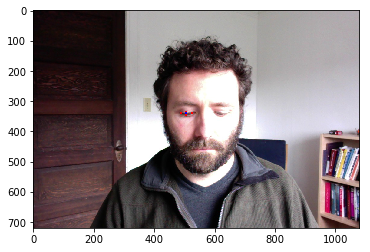

In [55]:
face = faces[0]
image_file = "data/test_imgs/" + face['id'] + '.jpg'
pimage = PIL.Image.open(image_file)
face_m = face['faces'][0]
lmarks = face['faces'][0]['faceLandmarks']
#pimage = plotEyes(pimage, lmarks)
pimage = plotEye(pimage, lmarks)
plt.imshow(pimage)
print(eyeMetrics(face_m))

{'width': 33.400000000000034, 'height': 16.19999999999999, 'width_ratio': 0.06136363636363632, 'height_ratio': 0.06136363636363632, 'inner_pupil_ratio': 0.6497005988023942, 'outer_pupil_ratio': 0.3502994011976058, 'top_pupil_ratio': 0.3024691358024679, 'bottom_pupil_ratio': 0.6975308641975321, 'x_pupil_ratio': 1.8547008547008466, 'y_pupil_ratio': 0.4336283185840683, 'gaze': False}


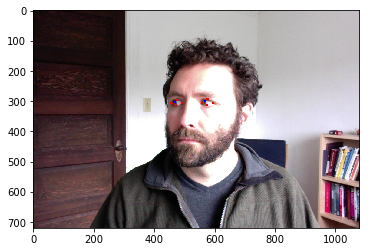

In [56]:
face = faces[1]
image_file = "data/test_imgs/" + face['id'] + '.jpg'
pimage = PIL.Image.open(image_file)
face_m = face['faces'][0]
lmarks = face['faces'][0]['faceLandmarks']
pimage = plotEyes(pimage, lmarks)
plt.imshow(pimage)
print(eyeMetrics(face_m))

{'width': 41.200000000000045, 'height': 19.899999999999977, 'width_ratio': 0.07158273381294956, 'height_ratio': 0.07158273381294956, 'inner_pupil_ratio': 0.5266990291262141, 'outer_pupil_ratio': 0.47330097087378586, 'top_pupil_ratio': 0.45728643216080567, 'bottom_pupil_ratio': 0.5427135678391943, 'x_pupil_ratio': 1.1128205128205153, 'y_pupil_ratio': 0.8425925925925982, 'gaze': True}


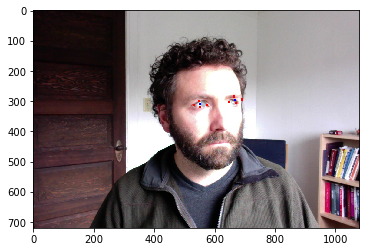

In [59]:
face = faces[2]
image_file = "data/test_imgs/" + face['id'] + '.jpg'
pimage = PIL.Image.open(image_file)
face_m = face['faces'][0]
lmarks = face['faces'][0]['faceLandmarks']
pimage = plotEyes(pimage, lmarks)
plt.imshow(pimage)
print(eyeMetrics(face_m))

{'width': 40.599999999999966, 'height': 21.80000000000001, 'width_ratio': 0.0816479400749064, 'height_ratio': 0.0816479400749064, 'inner_pupil_ratio': 0.4532019704433496, 'outer_pupil_ratio': 0.5467980295566505, 'top_pupil_ratio': 0.4954128440366975, 'bottom_pupil_ratio': 0.5045871559633025, 'x_pupil_ratio': 0.8288288288288282, 'y_pupil_ratio': 0.9818181818181828, 'gaze': True}


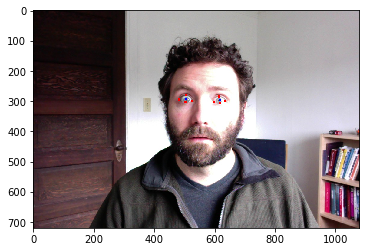

In [60]:
face = faces[3]
image_file = "data/test_imgs/" + face['id'] + '.jpg'
pimage = PIL.Image.open(image_file)
face_m = face['faces'][0]
lmarks = face['faces'][0]['faceLandmarks']
pimage = plotEyes(pimage, lmarks)
plt.imshow(pimage)
print(eyeMetrics(face_m))

{'width': 37.39999999999998, 'height': 15.900000000000034, 'width_ratio': 0.05781818181818194, 'height_ratio': 0.05781818181818194, 'inner_pupil_ratio': 0.44385026737968003, 'outer_pupil_ratio': 0.55614973262032, 'top_pupil_ratio': 0.31446540880503077, 'bottom_pupil_ratio': 0.6855345911949692, 'x_pupil_ratio': 0.7980769230769259, 'y_pupil_ratio': 0.4587155963302738, 'gaze': True}


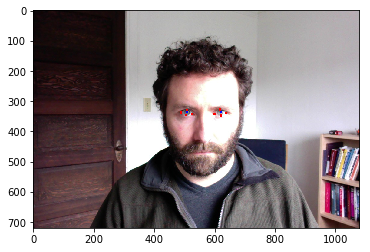

In [57]:
face = faces[4]
image_file = "data/test_imgs/" + face['id'] + '.jpg'
pimage = PIL.Image.open(image_file)
face_m = face['faces'][0]
lmarks = face['faces'][0]['faceLandmarks']
pimage = plotEyes(pimage, lmarks)
plt.imshow(pimage)
print(eyeMetrics(face_m))

{'width': 30.5, 'height': 12.599999999999966, 'width_ratio': 0.04754716981132063, 'height_ratio': 0.04754716981132063, 'inner_pupil_ratio': 0.5049180327868864, 'outer_pupil_ratio': 0.49508196721311365, 'top_pupil_ratio': 0.4206349206349227, 'bottom_pupil_ratio': 0.5793650793650773, 'x_pupil_ratio': 1.0198675496688787, 'y_pupil_ratio': 0.7260273972602801, 'gaze': True}


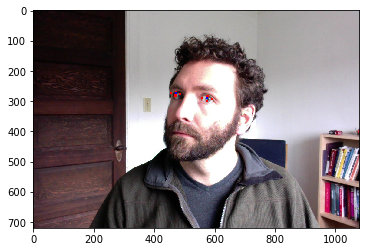

In [58]:
face = faces[5]
image_file = "data/test_imgs/" + face['id'] + '.jpg'
pimage = PIL.Image.open(image_file)
face_m = face['faces'][0]
lmarks = face['faces'][0]['faceLandmarks']
pimage = plotEyes(pimage, lmarks)
plt.imshow(pimage)
print(eyeMetrics(face_m))

{'width': 41.10000000000002, 'height': 19.0, 'width_ratio': 0.07364341085271318, 'height_ratio': 0.07364341085271318, 'inner_pupil_ratio': 0.5352798053527977, 'outer_pupil_ratio': 0.46472019464720227, 'top_pupil_ratio': 0.43157894736842045, 'bottom_pupil_ratio': 0.5684210526315795, 'x_pupil_ratio': 1.1518324607329828, 'y_pupil_ratio': 0.7592592592592575, 'gaze': True}


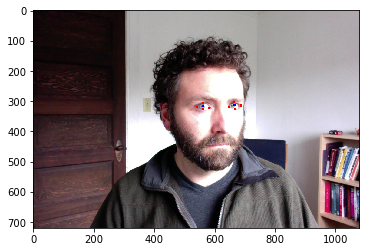

In [61]:
face = faces[6]
image_file = "data/test_imgs/" + face['id'] + '.jpg'
pimage = PIL.Image.open(image_file)
face_m = face['faces'][0]
lmarks = face['faces'][0]['faceLandmarks']
pimage = plotEyes(pimage, lmarks)
plt.imshow(pimage)
print(eyeMetrics(face_m))

IndexError: list index out of range